# THIS CODE IS USED TO TRAIN THE ROCK PAPER SCISSOR HAND SIGN USING YOLOv8



In [1]:
# update ultralytics module to the latest one

!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 7.4 MB/s eta 0:00:00


note: installation of Ultralytics package to implement YOLO

## IMPORTS YOLO CLASS FROM ULTRALYTICS LIBRARY AND CHECK THE YOLO VERSION INSTALLED

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 765, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'train', 'export', 'benchmark', 'track', 'val'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'classify', 'pose', 'segment', 'obb'}
                MODE (required) is one of {'predict', 'train', 'export', 'benchmark', 'track', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

## DOWNLOAD THE ANNOTATED DATASET FROM ROBOFLOW PERMANENTLY ON GOOGLE DRIVE

In [3]:
# Install the Roboflow library
!pip install roboflow

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import Roboflow and OS module for file operations
from roboflow import Roboflow
import os
import shutil

# Initialize Roboflow with your API key
rf = Roboflow(api_key="API_Key")

# Access the specific project and version
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)

# Download the dataset to the default temporary directory
dataset = version.download("yolov8")

# Define the path where the dataset should be saved in your Google Drive
save_path = '/content/drive/My Drive/Colab Notebooks/GithubVision'

# Create the target directory if it doesn't exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Move the dataset to the specified path
shutil.move(dataset.location, save_path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
Mounted at /content/drive
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov8:: 100%|██████████| 14682/14682 [00:02<00:00, 5918.56it/s]


'/content/drive/My Drive/Colab Notebooks/GithubVision/rock-paper-scissors-14'

## MODEL TRAINING USING YOLOv8 ARCHITECTURE

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/drive/My Drive/Colab Notebooks/GitHubVision/rock-paper-scissors-14/data.yaml' epochs=10 imgsz=640


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/RockPaperScissor/rock-paper-scissors-14/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

## COPY TRAINING RESULTS TO GOOGLE DRIVE

In [ ]:
import shutil

# Define the source and destination paths
source_path = 'runs/detect/train3'
destination_path = '/content/drive/My Drive/Colab Notebooks/GitHubVision/rock-paper-scissors-14/runs/detect/train'

# Copy the directory
shutil.copytree(source_path, destination_path)


'/content/drive/My Drive/Colab Notebooks/GitHubVision/rock-paper-scissors-14/runs/detect/train'

##CONFUSION MATRIX

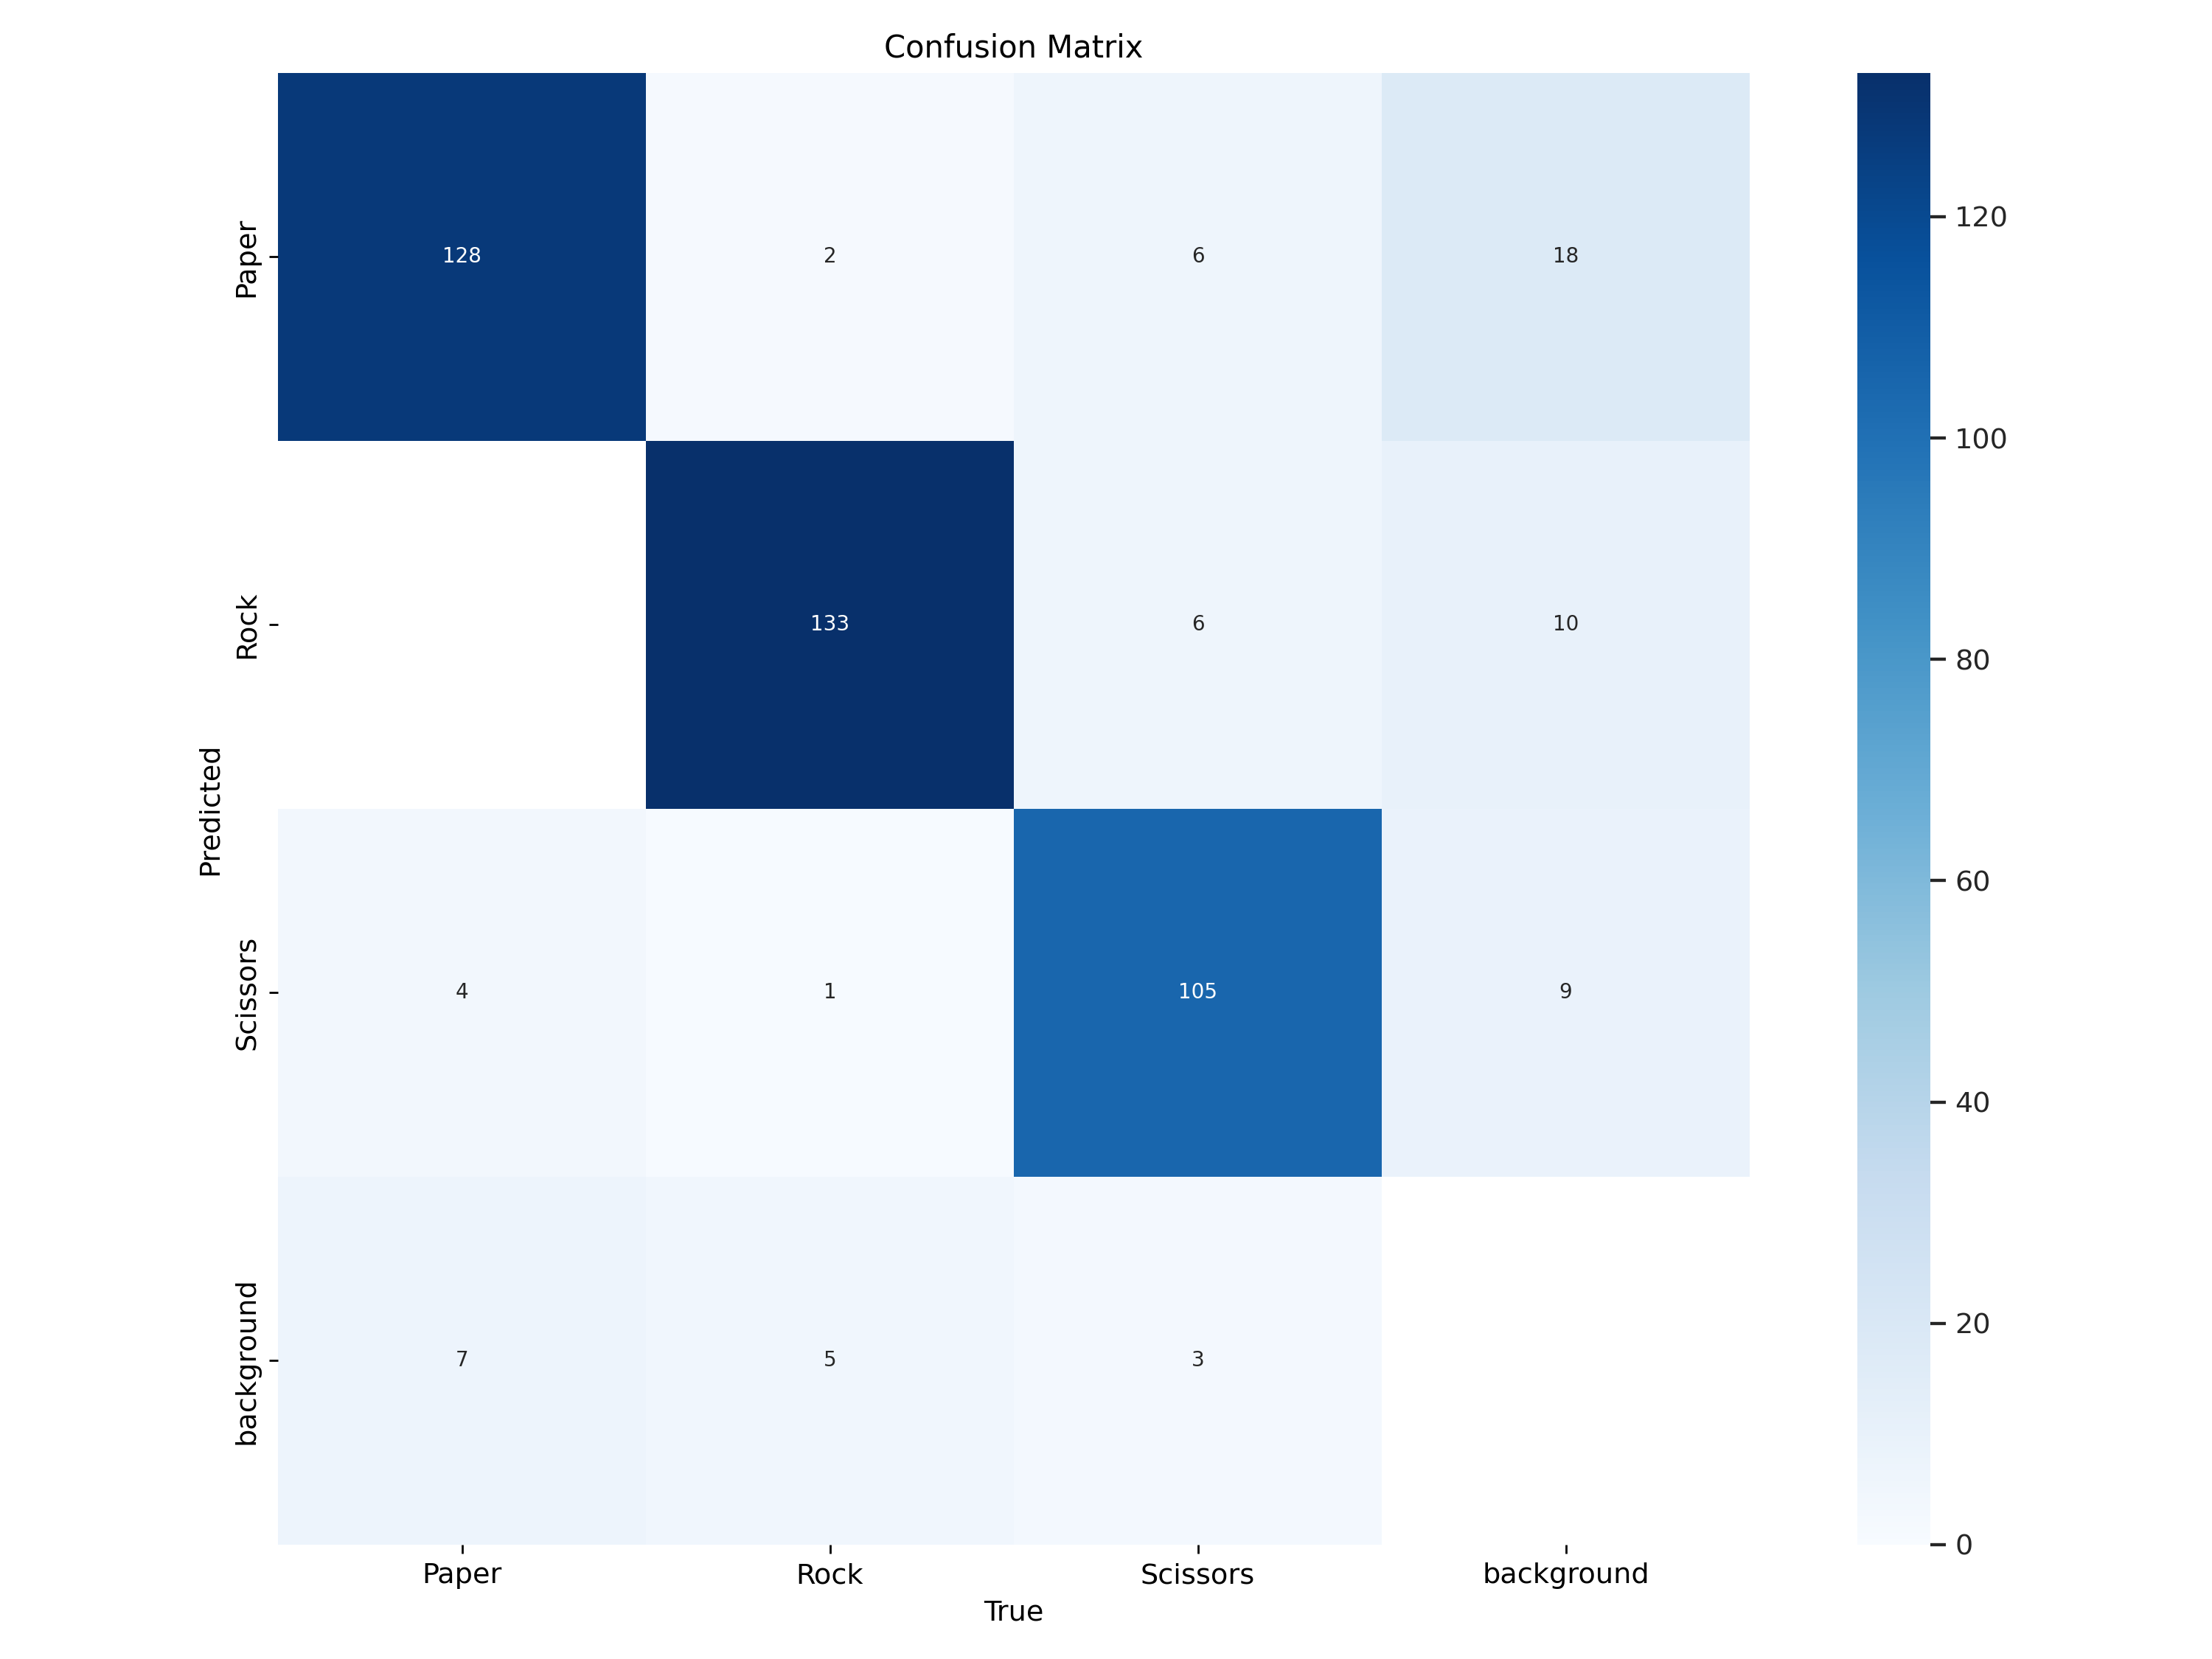

In [ ]:
from IPython.display import Image  # This ensures you are using the Image class from IPython.display

# Now you can display the image using the correct class
Image(filename='/content/runs/detect/train3/confusion_matrix.png', width=600)

## Confusion Matrix Analysis

### Confusion Matrix Analysis Table

| Class       | True Positives | Misclassified as Paper | Misclassified as Rock | Misclassified as Scissors | Misclassified as Background |
|-------------|----------------|------------------------|------------------------|---------------------------|-----------------------------|
| Paper       | 128            | 0                      | 2                      | 6                         | 18                          |
| Rock        | 133            | 6                      | 0                      | 0                         | 10                          |
| Scissors    | 105            | 4                      | 1                      | 0                         | 9                           |
| Background  | 3              | 7                      | 5                      | 0                         | 0                           |

### Detailed Breakdown

1. **True Positives (Correct Predictions)**:
   - **Paper**: 128 instances correctly classified as Paper.
   - **Rock**: 133 instances correctly classified as Rock.
   - **Scissors**: 105 instances correctly classified as Scissors.
   - **Background**: 3 instances correctly classified as Background.

2. **Misclassifications**:
   - **Paper Misclassifications**:
     - 2 instances misclassified as Rock.
     - 6 instances misclassified as Scissors.
     - 18 instances misclassified as Background.
   
   - **Rock Misclassifications**:
     - 6 instances misclassified as Paper.
     - 10 instances misclassified as Background.
   
   - **Scissors Misclassifications**:
     - 4 instances misclassified as Paper.
     - 1 instance misclassified as Rock.
     - 9 instances misclassified as Background.
   
   - **Background Misclassifications**:
     - 7 instances misclassified as Paper.
     - 5 instances misclassified as Rock.

3. **Summary**:
   - **Highest accuracy** is observed for the **Rock** class with 133 correctly identified instances, followed by **Paper** with 128 correct classifications.
   - **Scissors** class performs fairly well, with 105 correct predictions but some confusion with the other classes.
   - The **Background** class has the lowest accuracy, with only 3 correctly identified instances and relatively high misclassification with other classes.

4. **Overall Insights**:
   - The classifier does well distinguishing between Paper, Rock, and Scissors, but it struggles with identifying the background, likely confusing it with actual hand signs.
   - Improving background classification or reducing overlap between hand signs and the background class might help the model achieve higher accuracy across all classes.




## MODEL PERFORMANCE ON VALIDATION SET

This command validates a YOLOv8 model for object detection using a specified dataset and configuration using validation set

In [ ]:
!yolo task=detect mode=val model='/content/drive/My Drive/Colab Notebooks/GitHubVision/rock-paper-scissors-14/runs/detect/train/weights/best.pt' data='/content/drive/My Drive/Colab Notebooks/GitHubVision/rock-paper-scissors-14/data.yaml' imgsz=640


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/My Drive/Colab Notebooks/RockPaperScissor/rock-paper-scissors-14/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100% 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:10<00:00,  3.60it/s]
                   all        576        400      0.914      0.896      0.937       0.74
                 Paper        132        139      0.887      0.906      0.939      0.737
                  Rock        121        141      0.921      0.906      0.936      0.732
              Scissors        116        120      0.936      0.875      0.935       0.75
Speed: 1.2ms preprocess, 4.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/va

## Validation Test Results

** Summary Table**

| Class       | Images | Instances | Precision | Recall | mAP@50 | mAP@50-95 |
|-------------|--------|-----------|-----------|--------|--------|-----------|
| All         | 576    | 400       | 0.914     | 0.896  | 0.937  | 0.74      |
| Paper       | 132    | 139       | 0.887     | 0.906  | 0.939  | 0.737     |
| Rock        | 121    | 141       | 0.921     | 0.906  | 0.936  | 0.732     |
| Scissors    | 116    | 120       | 0.936     | 0.875  | 0.935  | 0.75      |

### Detailed Breakdown

1. **Overall Performance**:
   - Across all classes, the model processed **576 images** with **400 instances** of hand signs.
   - Achieved an overall **Precision** of 0.914 and **Recall** of 0.896.
   - The model's **mAP@50** (mean Average Precision at 50% IoU) is 0.937, indicating good detection accuracy.
   - **mAP@50-95** score is 0.74, suggesting moderate performance over a range of IoU thresholds.

2. **Class-Specific Results**:
   - **Paper**:
     - Processed 132 images with 139 instances of the Paper hand sign.
     - Precision: 0.887, Recall: 0.906
     - mAP@50: 0.939, mAP@50-95: 0.737
   
   - **Rock**:
     - Processed 121 images with 141 instances of the Rock hand sign.
     - Precision: 0.921, Recall: 0.906
     - mAP@50: 0.936, mAP@50-95: 0.732

   - **Scissors**:
     - Processed 116 images with 120 instances of the Scissors hand sign.
     - Precision: 0.936, Recall: 0.875
     - mAP@50: 0.935, mAP@50-95: 0.75

### Insights
- **Highest Precision** is observed in the **Scissors** class (0.936), suggesting the model is most accurate in detecting Scissors.
- **Highest Recall** is achieved in the **Paper** and **Rock** classes (0.906).
- **mAP@50** scores are high for all classes, indicating that the model can accurately detect each hand sign.
- Moderate **mAP@50-95** scores reflect that the model performs reasonably well across a range of IoU thresholds but could benefit from further tuning for higher IoU ranges.
  
These results show that the model performs well in classifying and detecting hand signs, with room for improvement in consistency across different IoU thresholds.


## Copying Model Weights to Backup Directory

In [ ]:
import shutil

# Source paths
last_weights_path = '/content/runs/detect/train3/weights/last.pt'
best_weights_path = '/content/runs/detect/train3/weights/best.pt'

# Destination paths
backup_directory = r"C:\Users\Username\Desktop" # Change to your preferred backup location
shutil.copy(last_weights_path, backup_directory + 'last_epoch_weights.pt')
shutil.copy(best_weights_path, backup_directory + 'best_performance_weights.pt')

'C:\\Users\\GamingPC\\Desktopbest_performance_weights.pt'

### Copying Model Weights to Backup Directory

This code snippet copies the latest and best model weights from a training session to a specified backup directory. Here's a short description of what each part does:

1. **Import shutil**: The `shutil` module is used for high-level file operations.

2. **Source Paths**: Define the paths to the latest and best model weight files:
   - `last_weights_path`: Path to the latest model weights.
   - `best_weights_path`: Path to the best-performing model weights.

3. **Destination Path**: Define the directory where the weights will be backed up:
   - `backup_directory`: Path to the backup location.

4. **Copy Files**: Use `shutil.copy` to copy the weight files to the backup directory with new filenames:
   - Copy the latest weights to `backup_directory` as `last_epoch_weights.pt`.
   - Copy the best weights to `backup_directory` as `best_performance_weights.pt`.




## Downloading Model Weights from Google Colab
This code snippet is used to download the latest and best model weight files from a Google Colab environment to your local machine.

In [ ]:
from google.colab import files

# Paths to your files
last_weights_path = '/content/runs/detect/train3/weights/last.pt'
best_weights_path = '/content/runs/detect/train3/weights/best.pt'

# Trigger the download
files.download(last_weights_path)
files.download(best_weights_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##REAL-TIME MODEL INFERENCING
By using the downloaded best weight model, the weight is then used for inferencing for real time detecton using webcam through the code below:

In [ ]:
rom ultralytics import YOLO
import cv2

# Load the model
model = YOLO(r"C:\..\best.pt")

# Run predictions and display results using the built-in functionality
model.predict(source=0, show=True, conf=0.5)  # source '0' for webcam, show=True to display results